In [1]:
#import libraries 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In this ICP, we are going to implement Decision Tree classifier on Pima Indian Diabetes.

Next, download the dataset from its weblink as follows:

In [2]:
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'

pima = pd.read_csv(url,  error_bad_lines=False )
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now, split the dataset into features and target variable as follows:

In [3]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

Next, we will divide the data into train and test split. The following code will split the dataset into 70% training data and 30% of testing data 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Next, train the model with the help of DecisionTreeClassifier class of sklearn as follows

In [5]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

At last we need to make prediction. It can be done with the help of following script 

In [6]:
y_pred = clf.predict(X_test)

Next, we can get the accuracy score, confusion matrix and classification report as follows −

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[114  32]
 [ 39  46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       146
           1       0.59      0.54      0.56        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231

Accuracy: 0.6926406926406926


Visualizing Decision Tree

The above decision tree can be visualized with the help of following code

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


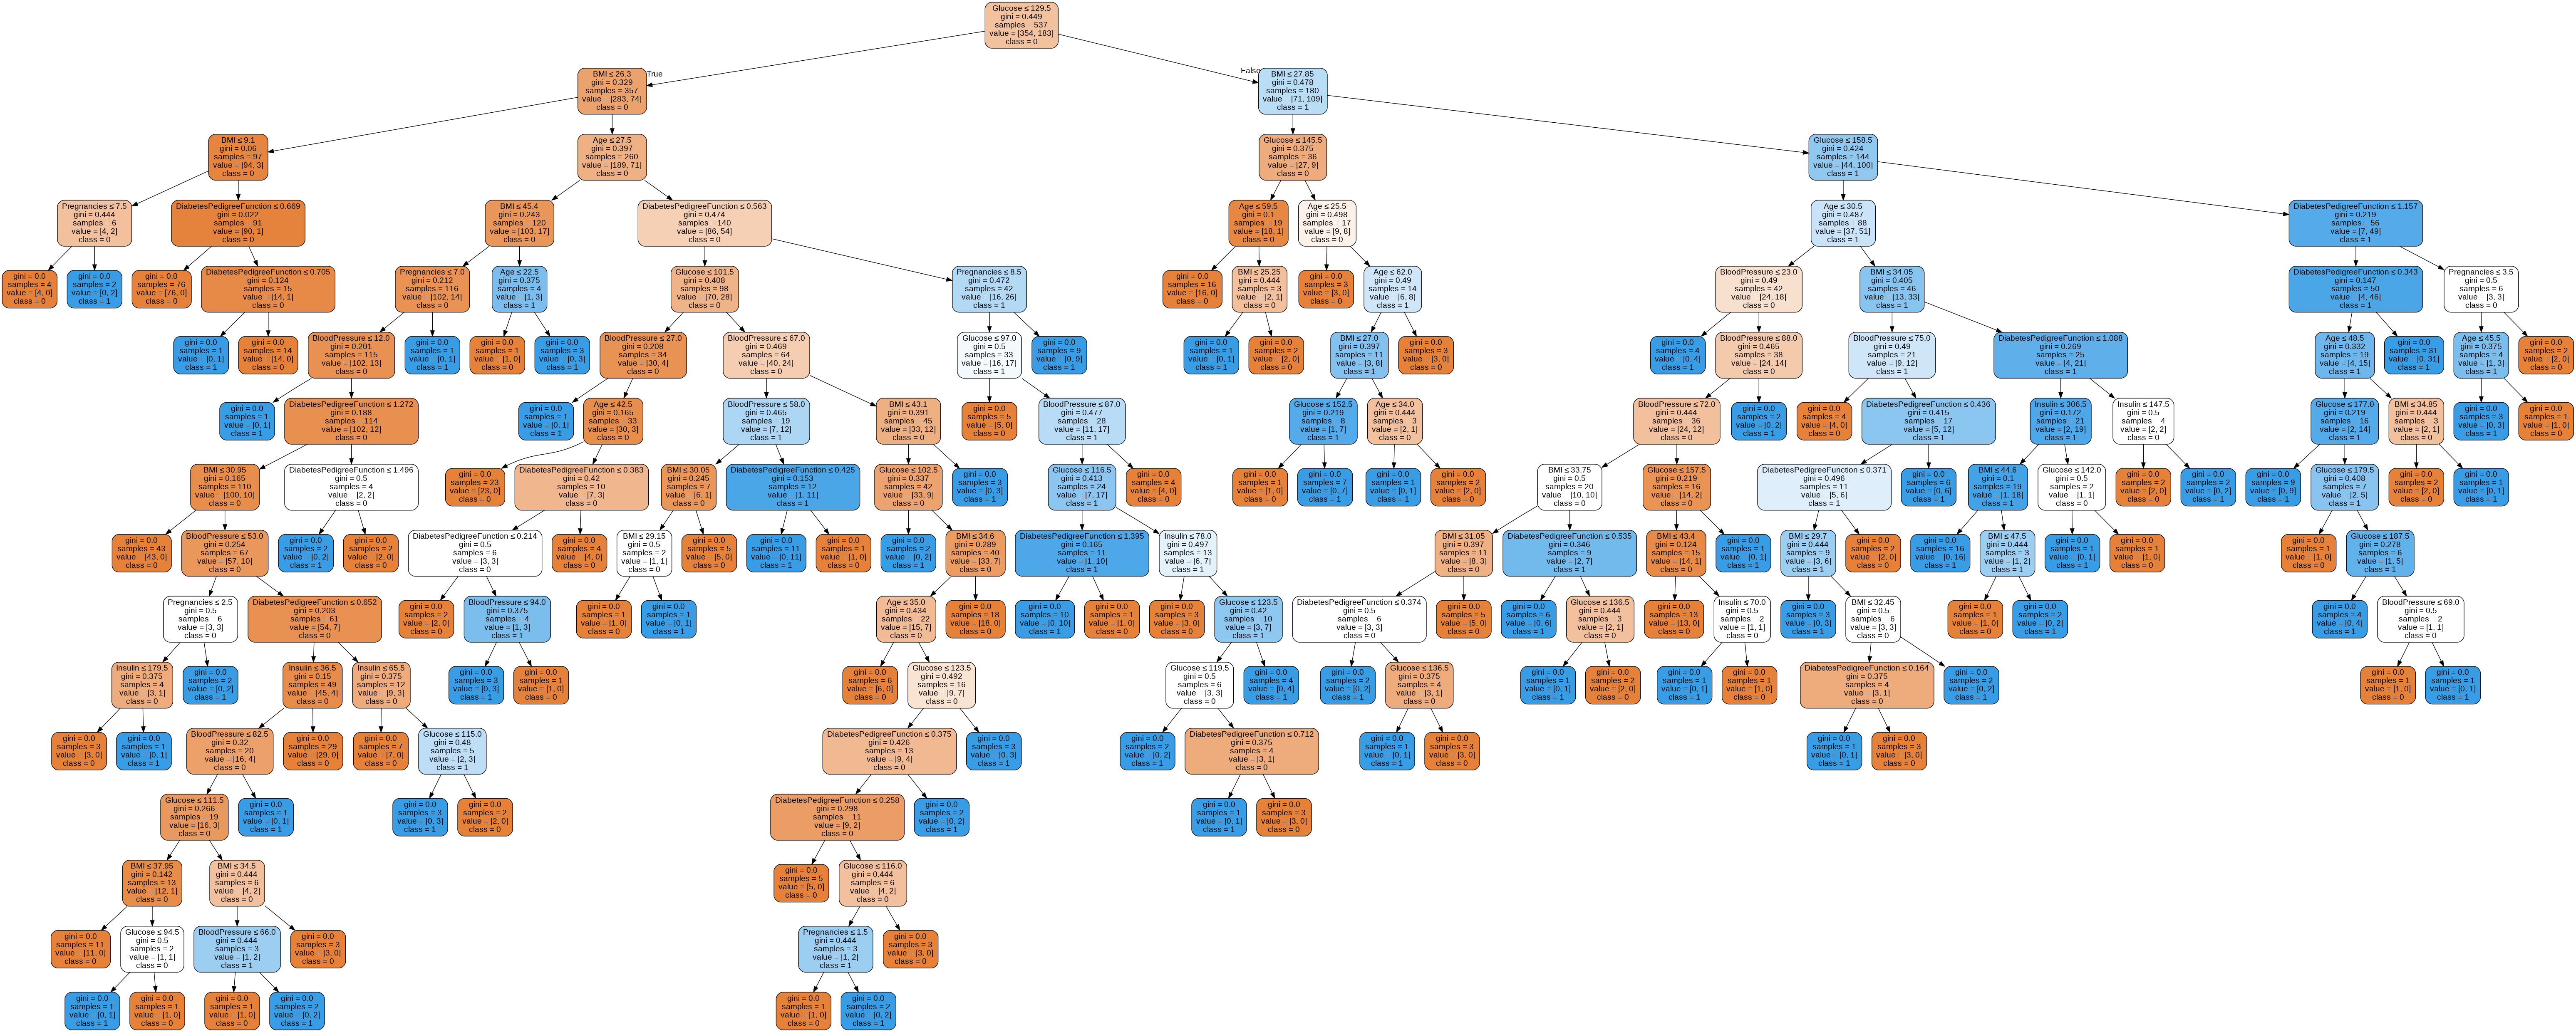

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())

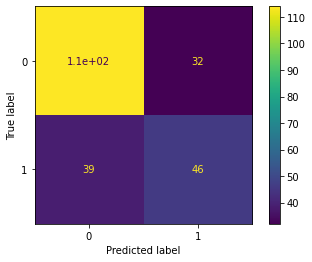

In [9]:
#create a more colorful confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmd.plot()